In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))


def make_weights_and_biases(dim):
    weights = []
    biases = []
    L = len(dim) - 1
    for i in range(L):
        weights.append(np.random.normal(0, 1, (dim[i], dim[i+1])))
        biases.append(np.random.normal(0, 1, (dim[i+1], 1)))
    return weights, biases


def feed_forward(x, weights, biases):
    z_list = [] #linear combination of outputs of previous layer, fed into the nodes of next layer 
    a_list = [] #activations, the values that comes out of each node
    
    a = x
    a_list.append(a) #note, a_list is one longer than z_list!
    for w, b in zip(weights, biases):
        z = w.T@a + b
        a = sigmoid(z)
        
        z_list.append(z)
        a_list.append(a)
    
    return a, z_list, a_list


def back_prop(x, y, weights, biases):
    m = y.shape[1] #number of samples
    num_layers = len(weights) + 1
    grad_weights = []
    grad_biases = []
    
    y_pred, z_list, a_list = feed_forward(x, weights, biases)
    
    #Compute gradient of weights and biases of last layer(output)
    #--------------------------------------------------------------
    J = y_pred - y #derivative of cross-entropy and softmax function
    grad_w = 1/m *a_list[-2]@J.T
    grad_b = 1/m*np.sum(J, axis=1).reshape(-1,1)
    #grad_b = 1/m*(J@np.ones((m,1))) #alternative form
    
    grad_weights.append(grad_w)
    grad_biases.append(grad_b)
    #--------------------------------------------------------------

    for i in reversed(range(num_layers - 2)):         #work thru rest of layers in reverse
        J = sigmoid_deriv(z_list[i])*(weights[i+1]@J)
         
        grad_w = 1/m *a_list[i]@J.T
        grad_b = 1/m*np.sum(J, axis=1).reshape(-1,1)
        #grad_b = 1/m *np.sum(J, axis=1)              #alternative form
        
        grad_weights.append(grad_w)
        grad_biases.append(grad_b)
        
        grad_weights.reverse()    #reverse in-place, stupid python list...
        grad_biases.reverse()
    
    return grad_weights, grad_biases

    

### Generate data for classification

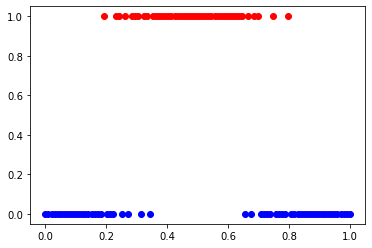

In [3]:
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n).reshape(1,-1)
y = 1.1 - 3*x + 3*x**2 + np.random.normal(0, 0.1, (1,n)) < 0.5

plt.plot(x[y==0], y[y==0], "bo")
plt.plot(x[y==1], y[y==1], "ro")
plt.show()

X = np.vstack((x, x**2))

dim = [2, 5, 1] #two inputs, single hidden layer with 5 nodes, 1 output
weights, biases = make_weights_and_biases(dim)

### Initialize model and test before training

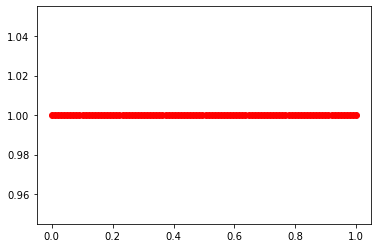

In [4]:
y_tilde, _, _ = feed_forward(X, weights, biases)
y_tilde = np.round(y_tilde)

plt.plot(x[y_tilde==0], y_tilde[y_tilde==0], "bo")
plt.plot(x[y_tilde==1], y_tilde[y_tilde==1], "ro")
plt.show()

Sucks!

### Training with GD

In [5]:
eta = 1
for j in range(1000):
    grad_weights, grad_biases = back_prop(X, y, weights, biases)
    for i in range(len(weights)):
        weights[i] -= eta*grad_weights[i]
        biases[i] -= eta*grad_biases[i]

### Test on data after training

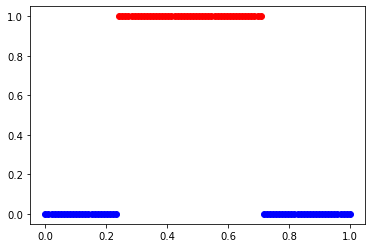

In [6]:
y_tilde, _, _ = feed_forward(X, weights, biases)
y_tilde = np.round(y_tilde)

plt.plot(x[y_tilde==0], y_tilde[y_tilde==0], "bo")
plt.plot(x[y_tilde==1], y_tilde[y_tilde==1], "ro")
plt.show()

Works!